In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas


In [2]:
import numpy as np
import pandas as pd

def PandasListToArray(DataFrames):
    exps = len(DataFrames)
    array  = np.zeros((exps,DataFrames[0]['LaunchTime'].count()))
    
    for i in range(0,exps):
        exp = DataFrames[i]['LaunchTime'].values
        exp.sort()
        exp = (exp - exp[0])/1000
        array[i,:] = exp
    
    return array
        

def TaskPerSecHist(array):
    exps = array.shape[0]
    temp = list()
    maxlen=0
    for i in range(0,exps):
        c =[0]
        sec =1
        for j in range(1,array.shape[1]):
            if array[i,j-1]<sec:
                c[sec-1]+=1
            else:
                sec+=1
                c.append(1)
        if len(c)> maxlen:
            maxlen=len(c)
        temp.append(c)
        
    hists = np.zeros((exps,maxlen))
    for i in range(0,exps):
        hists[i,0:len(temp[i])]=temp[i]
    
    return hists

In [3]:
profiles_spark_16=list()
profiles_spark_32=list()
profiles_spark_48=list()
profiles_spark_64=list()
for i in range(0,10):
    profiles_spark_16.append(pd.DataFrame.from_csv('SparkThroughput/Exp1nodeS%02d.csv'%(i)))
    profiles_spark_32.append(pd.DataFrame.from_csv('SparkThroughput/Exp2nodeS%02d.csv'%(i)))
    profiles_spark_48.append(pd.DataFrame.from_csv('SparkThroughput/Exp3nodeS%02d.csv'%(i)))
    profiles_spark_64.append(pd.DataFrame.from_csv('SparkThroughput/Exp4nodeS%02d.csv'%(i)))

In [4]:
prof_16_array = PandasListToArray(profiles_spark_16)
prof_32_array = PandasListToArray(profiles_spark_32)
prof_48_array = PandasListToArray(profiles_spark_48)
prof_64_array = PandasListToArray(profiles_spark_64)

In [5]:
throughput_16 = TaskPerSecHist(prof_16_array)
throughput_32 = TaskPerSecHist(prof_32_array)
throughput_48 = TaskPerSecHist(prof_48_array)
throughput_64 = TaskPerSecHist(prof_64_array)

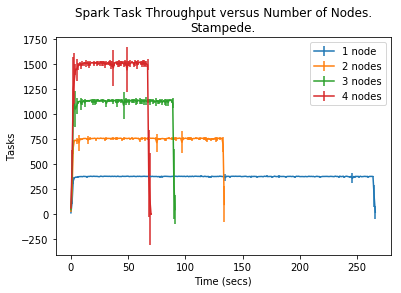

In [6]:
plt.figure()
plt.errorbar(range(0,throughput_16.shape[1]),throughput_16.mean(0),yerr=throughput_16.std(0),label='1 node')
plt.errorbar(range(0,throughput_32.shape[1]),throughput_32.mean(0),yerr=throughput_32.std(0),label='2 nodes')
plt.errorbar(range(0,throughput_48.shape[1]),throughput_48.mean(0),yerr=throughput_48.std(0),label='3 nodes')
plt.errorbar(range(0,throughput_64.shape[1]),throughput_64.mean(0),yerr=throughput_64.std(0),label='4 nodes')
plt.legend()
plt.title('Spark Task Throughput versus Number of Nodes.\nStampede.')
plt.ylabel('Tasks')
plt.xlabel('Time (secs)')
plt.savefig('SparkThroughputvsNodes.pdf',dpi=800,bbox_inches='tight')
plt.savefig('SparkThroughputvsNodes.png',dpi=800,bbox_inches='tight')